In [139]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d camnugent/california-housing-prices

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/camnugent/california-housing-prices
License(s): CC0-1.0
california-housing-prices.zip: Skipping, found more recently modified local copy (use --force to force download)


In [118]:
!unzip california-housing-prices.zip

Archive:  california-housing-prices.zip
replace housing.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [119]:
import pandas as pd
housing_pd = pd.read_csv('housing.csv')
housing_pd

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [120]:
housing_pd['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [121]:
housing_pd_shuffled = housing_pd.sample(n=len(housing_pd), random_state=1)
housing_pd_shuffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,<1H OCEAN
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,<1H OCEAN
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,<1H OCEAN
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,INLAND


In [122]:
pd.get_dummies(housing_pd_shuffled['ocean_proximity']).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,True,False,False,False,False
2151,False,True,False,False,False
15927,False,False,False,True,False
82,False,False,False,True,False
8161,True,False,False,False,False


In [123]:
housing_pd_shuffled.drop('ocean_proximity', axis=1).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0


In [124]:
housing_pd_final = pd.concat([housing_pd_shuffled.drop('ocean_proximity', axis=1),
                              pd.get_dummies(housing_pd_shuffled['ocean_proximity'])], axis=1)
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,True,False,False,False,False
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,False,True,False,False,False
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,False,False,False,True,False
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,False,False,False,True,False
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,True,False,False,False,False
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,True,False,False,False,False
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,True,False,False,False,False
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,False,True,False,False,False


In [125]:
housing_pd_final = housing_pd_final[['longitude',	'latitude',
                                     'housing_median_age',	'total_rooms',
                                     'total_bedrooms',	'population',
                                     'households',	'median_income',
                                     '<1H OCEAN',
                                     'INLAND',	'ISLAND',
                                     'NEAR BAY',	'NEAR OCEAN', 'median_house_value']]
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,True,False,False,False,False,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,False,True,False,False,False,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,False,False,False,True,False,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,False,False,False,True,False,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,True,False,False,False,False,225400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,True,False,False,False,False,205300.0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,True,False,False,False,False,500001.0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,True,False,False,False,False,104800.0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,False,True,False,False,False,140700.0


In [126]:
housing_pd_final = housing_pd_final.dropna()
len(housing_pd_final)

20433

In [127]:
train_pd, test_pd, val_pd = housing_pd_final[:18000], housing_pd_final[18000:19217], housing_pd_final[19215:]
len(train_pd), len(test_pd), len(val_pd)

(18000, 1217, 1218)

In [128]:
X_train, y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, -1]
X_val, y_val = val_pd.to_numpy()[:, :-1], val_pd.to_numpy()[:, -1]
X_test, y_test = test_pd.to_numpy()[:, :-1], test_pd.to_numpy()[:, -1]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((18000, 13), (18000,), (1218, 13), (1218,), (1217, 13), (1217,))

In [129]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler().fit(X_train[:, :8])

def preprocessor(X):
  A = np.copy(X)
  A[:, :8] = scaler.transform(A[:, :8])
  return A

X_train, X_val, X_test = preprocessor(X_train), preprocessor(X_val), preprocessor(X_test)


In [130]:
X_train.shape, X_val.shape, X_test.shape

((18000, 13), (1218, 13), (1217, 13))

In [131]:
pd.DataFrame(X_train_preprocessed).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.603443,-0.736073,0.820845,0.081039,0.315396,-0.27684,0.328234,-0.326667,True,False,False,False,False
1,-0.105122,0.537108,0.661774,-0.206526,-0.196843,-0.246809,-0.160526,-0.995001,False,True,False,False,False
2,-1.422454,0.981785,1.377592,-0.374924,-0.301674,0.098553,-0.244613,0.074459,False,False,False,True,False
3,-1.352596,1.019231,1.854804,-1.055419,-1.049782,-1.07974,-1.082862,-1.235508,False,False,False,True,False
4,0.718211,-0.848412,0.661774,-0.507894,-0.589957,-0.628385,-0.567825,0.687448,True,False,False,False,False


<Axes: >

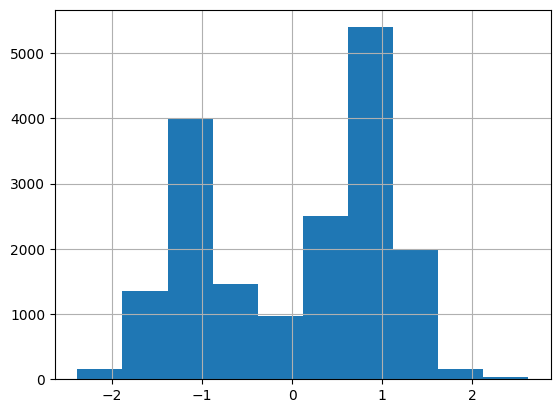

In [153]:
pd.DataFrame(X_train_preprocessed)[0].hist()

In [133]:
# sum((y_hat(x) - y)^2)/n - average sum of error square/n for regression problems

In [134]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(X_train, y_train)
mse(lm.predict(X_train), y_train, squared=False), mse(lm.predict(X_val), y_val, squared=False)

(68593.05578127236, 71382.43558330165)

In [135]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10).fit(X_train, y_train)
mse(knn.predict(X_train), y_train, squared=False), mse(knn.predict(X_val), y_val, squared=False)

(53759.09908812057, 62161.22860469906)

In [136]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=10).fit(X_train, y_train)
mse(rfr.predict(X_train), y_train, squared=False), mse(rfr.predict(X_val), y_val, squared=False)

(43573.65513535381, 53495.5494312677)

In [137]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=250).fit(X_train, y_train)
mse(gbr.predict(X_train), y_train, squared=False), mse(gbr.predict(X_val), y_val, squared=False)

(47274.82259072157, 51372.83463508617)

In [146]:
import numpy as np

# Convert to appropriate data types
X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
X_val = np.array(X_val, dtype=np.float32)
y_val = np.array(y_val, dtype=np.float32)

# Print data types to verify
print(X_train.dtype)  # should be float32
print(y_train.dtype)  # should be float32
print(X_val.dtype)    # should be float32
print(y_val.dtype)    # should be float32

# Define your model, optimizer, and checkpoint
cp = ModelCheckpoint('models/simple_nn', save_best_only=True)
opt = 'adam'  # Example optimizer, replace with your actual optimizer

# Compile and fit the model
simple_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
simple_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)


float32
float32
float32
float32
Epoch 1/100
563/563 [==============================] - 5s 6ms/step - loss: 56089223168.0000 - root_mean_squared_error: 236831.6406 - val_loss: 56512376832.0000 - val_root_mean_squared_error: 237723.3125
Epoch 2/100
563/563 [==============================] - 3s 5ms/step - loss: 56088887296.0000 - root_mean_squared_error: 236830.9219 - val_loss: 56512131072.0000 - val_root_mean_squared_error: 237722.7969
Epoch 3/100
563/563 [==============================] - 1s 2ms/step - loss: 56088686592.0000 - root_mean_squared_error: 236830.5000 - val_loss: 56511918080.0000 - val_root_mean_squared_error: 237722.3594
Epoch 4/100
563/563 [==============================] - 2s 3ms/step - loss: 56088453120.0000 - root_mean_squared_error: 236830.0156 - val_loss: 56511676416.0000 - val_root_mean_squared_error: 237721.8438
Epoch 5/100
563/563 [==============================] - 2s 4ms/step - loss: 56088215552.0000 - root_mean_squared_error: 236829.5000 - val_loss: 56511447040.0

In [147]:
from tensorflow.keras.models import load_model

simple_nn = load_model('models/simple_nn')
mse(simple_nn.predict(X_train), y_train, squared=False), mse(simple_nn.predict(X_val), y_val, squared=False)

39/39 [==============================] - 0s 1ms/step


(236782.77, 237674.9)

In [148]:
medium_nn = Sequential()
medium_nn.add(InputLayer((13,)))
medium_nn.add(Dense(32, 'relu'))
medium_nn.add(Dense(16, 'relu'))
medium_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/medium_nn', save_best_only=True)
medium_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
medium_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
563/563 [==============================] - 3s 4ms/step - loss: 8808928256.0000 - root_mean_squared_error: 93855.8906 - val_loss: 4801219584.0000 - val_root_mean_squared_error: 69290.8359
Epoch 2/100
563/563 [==============================] - 2s 3ms/step - loss: 4499710976.0000 - root_mean_squared_error: 67079.8828 - val_loss: 4699949568.0000 - val_root_mean_squared_error: 68556.1797
Epoch 3/100
563/563 [==============================] - 1s 3ms/step - loss: 4385859072.0000 - root_mean_squared_error: 66225.8203 - val_loss: 4599826432.0000 - val_root_mean_squared_error: 67822.0234
Epoch 4/100
563/563 [==============================] - 1s 2ms/step - loss: 4290904064.0000 - root_mean_squared_error: 65504.9922 - val_loss: 4620857344.0000 - val_root_mean_squared_error: 67976.8906
Epoch 5/100
563/563 [==============================] - 1s 3ms/step - loss: 4244001792.0000 - root_mean_squared_error: 65146.0039 - val_loss: 4487754240.0000 - val_root_mean_squared_error: 66990.7031
Epoch

In [149]:
medium_nn = load_model('models/medium_nn')
mse(medium_nn.predict(X_train), y_train, squared=False), mse(medium_nn.predict(X_val), y_val, squared=False)

39/39 [==============================] - 0s 1ms/step


(52299.98, 56064.36)

In [150]:
large_nn = Sequential()
large_nn.add(InputLayer((13,)))
large_nn.add(Dense(256, 'relu'))
large_nn.add(Dense(128, 'relu'))
large_nn.add(Dense(64, 'relu'))
large_nn.add(Dense(32, 'relu'))
large_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/large_nn', save_best_only=True)
large_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
large_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
563/563 [==============================] - 3s 4ms/step - loss: 6153832448.0000 - root_mean_squared_error: 78446.3672 - val_loss: 6610250752.0000 - val_root_mean_squared_error: 81303.4453
Epoch 2/100
563/563 [==============================] - 2s 4ms/step - loss: 4643816960.0000 - root_mean_squared_error: 68145.5547 - val_loss: 4472430080.0000 - val_root_mean_squared_error: 66876.2266
Epoch 3/100
563/563 [==============================] - 2s 4ms/step - loss: 4074799872.0000 - root_mean_squared_error: 63834.1602 - val_loss: 4324507136.0000 - val_root_mean_squared_error: 65760.9844
Epoch 4/100
563/563 [==============================] - 2s 4ms/step - loss: 3756910848.0000 - root_mean_squared_error: 61293.6445 - val_loss: 4149218560.0000 - val_root_mean_squared_error: 64414.4297
Epoch 5/100
563/563 [==============================] - 3s 6ms/step - loss: 3838335488.0000 - root_mean_squared_error: 61954.3008 - val_loss: 3909697024.0000 - val_root_mean_squared_error: 62527.5703
Epoch

In [151]:
large_nn = load_model('models/large_nn')
mse(large_nn.predict(X_train), y_train, squared=False), mse(large_nn.predict(X_val), y_val, squared=False)

39/39 [==============================] - 0s 2ms/step


(45830.22, 52845.28)

In [152]:
mse(gbr.predict(X_test), y_test, squared=False)

49324.054795312986

Through this data science project, we tackled the challenge of **predicting housing prices in California** using machine learning techniques. By leveraging a dataset containing various features such as location, housing characteristics, and demographic information, we aimed to develop models capable of accurately estimating median house values.

The ensemble model, **Gradient Boosting Regressor (GBR)**, demonstrated promising performance with a mean squared error (MSE) of approximately **49,324.05** when evaluated on the test set. This indicates that, on average, **the model's predictions deviated by approximately $49,324.05 from the actual house prices**.

Additionally, we explored the predictive capabilities of a feed-forward **neural network (NNM, MNM, LNM)** which, while not as accurate as the GBR model, provided valuable insights into the complexity of the housing price prediction task.

Overall, this project **addresses a real-world problem in the housing market by providing insights into factors influencing housing prices and delivering predictive models to assist stakeholders in making informed decisions**.

Moving forward, further refinement of the models and exploration of additional features could potentially enhance prediction accuracy and contribute to more robust decision-making processes in the real estate industry.